In [1]:
import os
import pandas as pd

In [29]:
# generation analysis

directory = '../result/generation_stat/'
filenames = os.listdir(directory)
print(filenames)

lines = []
for name in filenames:
    file = open(f'{directory}/{name}', 'r')
    line = file.readline()
    lines.append(line)
# print(lines)


fileds = ['name', 'num_vars', 'num_clauses', 'OWC_time', 'GNN_time', 'CELL_time', 'GEN_time_avg']

data_table = []
for line in lines:
    items = line.split(',')
    items = [x.split('.')[0]  if 'cnf' in x else float(x) for x in items]
    data_table.append(items)
    # print(f'{items[0]} & {items[1]} & {items[2]} & {items[3]:.3f} & {items[4]:.3f} & {items[5]:.3f} & {items[6]:.3f} \\\\')

# df = pd.DataFrame(data_table, columns=fileds)

['mrpp_4x4#4_4.processed.cnf.log', 'mrpp_4x4#4_5.processed.cnf.log', 'mrpp_4x4#6_5.processed.cnf.log', 'countbitssrl016.processed.cnf.log', 'ssa2670-130.processed.cnf.log', 'bmc-ibm-5.processed.cnf.log', 'smulo016.processed.cnf.log', 'sat_prob_83.processed.cnf.log', 'mrpp_4x4#8_8.processed.cnf.log', 'countbitsrotate016.processed.cnf.log', 'aes_64_1_keyfind_1.processed.cnf.log', 'bf0432-007.processed.cnf.log', 'bmc-ibm-7.processed.cnf.log', 'ssa2670-141.processed.cnf.log', 'bmc-ibm-2.processed.cnf.log', 'cmu-bmc-longmult15.processed.cnf.log', 'aes_32_3_keyfind_2.processed.cnf.log']
mrpp_4x4#4_4 & 208.0 & 1538.0  & 10.108 & 8.063 & 0.708 \\
mrpp_4x4#4_5 & 309.0 & 2517.0  & 15.515 & 5.155 & 1.229 \\
mrpp_4x4#6_5 & 330.0 & 2721.0  & 16.192 & 6.838 & 1.445 \\
countbitssrl016 & 1691.0 & 8378.0  & 43.677 & 77.375 & 10.169 \\
ssa2670-130 & 82.0 & 327.0  & 3.453 & 1.138 & 0.197 \\
bmc-ibm-5 & 1068.0 & 6042.0  & 32.036 & 39.594 & 4.294 \\
smulo016 & 1459.0 & 6288.0  & 29.048 & 98.561 & 4.601 \\


In [26]:
# solver performance

directory = '../result/glucose/'
filenames = os.listdir(directory)
lines = []
for name in filenames:
    file = open(f'{directory}/{name}', 'r')
    line = file.readline()
    lines.append(line)

names = ['countbitsrotate016', 'smulo016', 'cmu-bmc-longmult15', 'countbitssrl016', 'aes_32_3_keyfind_2', 'sat_prob_83']
vdecays = [0.75, 0.80, 0.85, 0.90, 0.95]
cdecays = [0.7, 0.8, 0.9, 0.99, 0.999]

data_1 = {'vars_decay': [], 'clau_decay': [], 'countbitssrl016': [],  'smulo016': [], 'cmu-bmc-longmult15': [], 'countbitsrotate016': [], 'aes_32_3_keyfind_2': [], 'sat_prob_83': []}

for v in vdecays:
    for c in cdecays:
        data_1['vars_decay'].append(v)
        data_1['clau_decay'].append(c)
        for line in lines:
            vars_decay, clau_decay, full_name, cost = line.split(',')
            if float(vars_decay) == v and float(clau_decay) == c :
                for name in names:
                    if name in full_name:
                        data_1[name].append(float(cost))


directory = '../result/glucose_generation/'
filenames = os.listdir(directory)
lines = []
for name in filenames:
    file = open(f'{directory}/{name}', 'r')
    line = file.readline()
    lines.append(line)

data_2 = {'vars_decay': [], 'clau_decay': [], 'countbitssrl016': [],  'smulo016': [], 'cmu-bmc-longmult15': [], 'countbitsrotate016': [], 'aes_32_3_keyfind_2': [], 'sat_prob_83': []}
for v in vdecays:
    for c in cdecays:
        data_2['vars_decay'].append(v)
        data_2['clau_decay'].append(c)
        for line in lines:
            vars_decay, clau_decay, full_name, cost = line.split(',')
            if float(vars_decay) == v and float(clau_decay) == c :
                for name in names:
                    if name in full_name:
                        data_2[name].append(float(cost))

df_1 = pd.DataFrame.from_dict(data_1)
df_2 = pd.DataFrame.from_dict(data_2)


# print(df_1.idxmin())
# for idx, min_idx in enumerate(df_1.idxmin()[2:]):
#     print(df_1['vars_decay'][min_idx], df_1['clau_decay'][min_idx], df_1.loc[min_idx][idx+2])
# print(df_2.idxmin())
for idx, min_idx in enumerate(df_2.idxmin()[2:]):
    print(df_2['vars_decay'][min_idx], df_2['clau_decay'][min_idx], df_2.loc[min_idx][idx+2])

# for value in df_1.iloc[0]:
#     print(value)

# for i in range(25):
#     print(f'{df_1.iloc[i][0]} & {df_1.iloc[i][1]} & ' + ' & '.join([f'{df_1.iloc[i][j]}/{df_2.iloc[i][j]:.3f}' for j in range(2, 8)]) + '\\\\')

0.85 0.7 0.876
0.8 0.999 0.717
0.95 0.9 1.143
0.85 0.8 0.627
0.85 0.999 0.474
0.95 0.7 0.865


In [2]:
fileds = ['name', 'num_vars', 'num_clauses', 'OWC_cost']
owc_cost = [['sat_prob_83', 1759, 8012, 3.6921498775482178],
 ['mrpp_4x4#4_5', 309, 2517, 1.2340118885040283],
 ['aes_64_1_keyfind_1', 320, 2088, 0.8239221572875977],
 ['bmc-ibm-2', 119, 573, 0.24820470809936523],
 ['ssa2670-141', 91, 377, 0.10036611557006836],
 ['bmc-ibm-5', 1068, 6042, 9.23050594329834],
 ['ssa2670-130', 82, 327, 0.09561800956726074],
 ['bmc-ibm-7', 860, 4797, 34.162067890167236],
 ['countbitsrotate016', 1122, 4555, 75.66227293014526],
 ['mrpp_4x4#8_8', 717, 6773, 5.633049011230469],
 ['mrpp_4x4#4_4', 208, 1538, 0.773461103439331],
 ['bf0432-007', 473, 2038, 87.00907278060913],
 ['smulo016', 1459, 6288, 64.8259048461914],
 ['countbitssrl016', 1691, 8378, 143.53057074546814],
 ['cmu-bmc-longmult15', 1731, 9791, 67.88365077972412],
 ['aes_32_3_keyfind_2', 450, 2204, 0.9877197742462158],
 ['mrpp_4x4#6_5', 330, 2721, 1.503798007965088]]

df = pd.DataFrame(owc_cost, columns=fileds)

In [3]:
import pickle
import matplotlib.pyplot as plt

plt.rc("savefig", bbox="tight")
plt.rc("xtick", direction="in")
plt.rc("ytick", direction="in")
# plt.rcParams.update({
#     "text.usetex": True,
#     "text.latex.preamble": "\\usepackage{tgpagella}",
#     "font.family": "serif",
#     # "font.serif": "Palatino",
# })

In [20]:

sort_df = df.sort_values(by=['num_clauses'])
sort_df

,name,num_vars,num_clauses,OWC_cost
6,ssa2670-130,82,327,0.095618
4,ssa2670-141,91,377,0.100366
3,bmc-ibm-2,119,573,0.248205
10,mrpp_4x4#4_4,208,1538,0.773461
11,bf0432-007,473,2038,87.009073
2,aes_64_1_keyfind_1,320,2088,0.823922
15,aes_32_3_keyfind_2,450,2204,0.987720
1,mrpp_4x4#4_5,309,2517,1.234012
16,mrpp_4x4#6_5,330,2721,1.503798
8,countbitsrotate016,1122,4555,75.662273


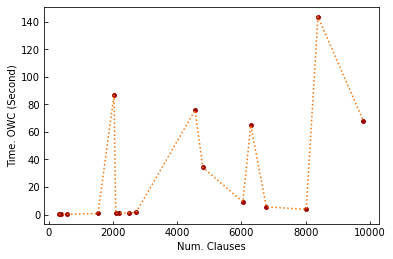

In [43]:
owc_x = sort_df["num_clauses"].to_numpy()
owc_y = sort_df['OWC_cost'].to_numpy()
plt.plot(owc_x, owc_y, linestyle="dotted", color="xkcd:orange")
plt.xlabel("Num. Clauses")
plt.ylabel("Time. OWC (Second)")
plt.scatter(owc_x, owc_y, color="xkcd:deep red", s=15)

plt.savefig("../fig/owc_cost.pdf", dpi=200)